In [2]:
#!pip install mysql-connector-python

or use the command
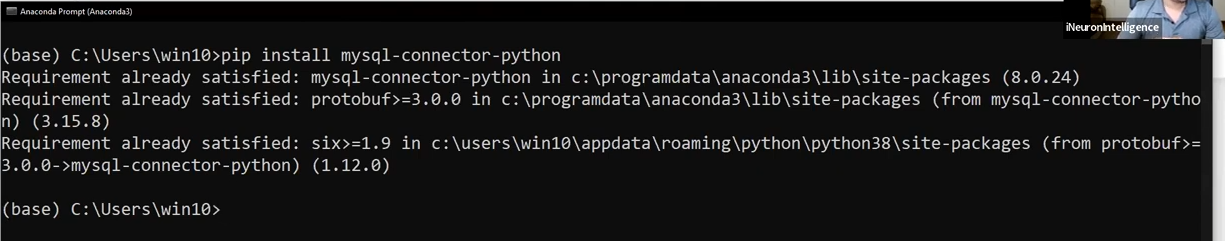

In [2]:
import mysql.connector as conn   # import the connector

In [3]:
# stablish a connection
mydb = conn.connect(host = "localhost", user="root",passwd="mysql")  # connecting to the databse

In [4]:
# creates a pointer
cursor = mydb.cursor()   

In [8]:
# execute a query
cursor.execute("show databases")

In [9]:
cursor.fetchall()   # produces a list of the available databases in workbench

[('glassdata',),
 ('glassdata1',),
 ('glassdata2',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('student',),
 ('sys',)]

In [17]:
# creates a pointer
cursor = mydb.cursor()   

In [18]:
# creates a database
cursor.execute("create database mariodb")

DatabaseError: 1007 (HY000): Can't create database 'mariodb'; database exists

In [20]:
cursor.execute("show databases")

InternalError: Unread result found

In [21]:
cursor.fetchall() 

[('glassdata',),
 ('glassdata1',),
 ('glassdata2',),
 ('information_schema',),
 ('mariodb',),
 ('mysql',),
 ('performance_schema',),
 ('student',),
 ('sys',)]

Structure table
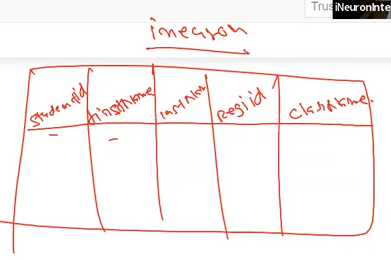

In [23]:
# creaates a table with the corresponding columns and data types
cursor.execute("create table mariodb.ineuron(studentid INT(10), firstname VARCHAR(30), lastname VARCHAR(30), classname VARCHAR(30))")

In [25]:
# select a database to be used
cursor.execute("use mariodb")

In [26]:
cursor.execute("show tables")

In [27]:
cursor.fetchall()

[('ineuron',)]

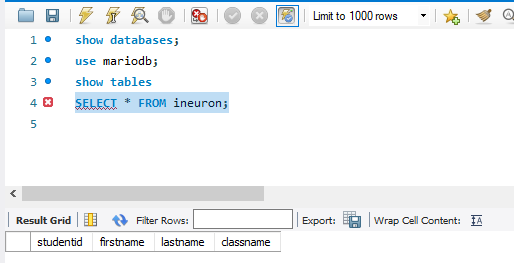

In [30]:
# insert data to a table within a db
cursor.execute('insert into mariodb.ineuron values(999, "mario", "rivillas", "FDS" )')

In [31]:
mydb.commit()   # only after commiting i can see the values updated in the database

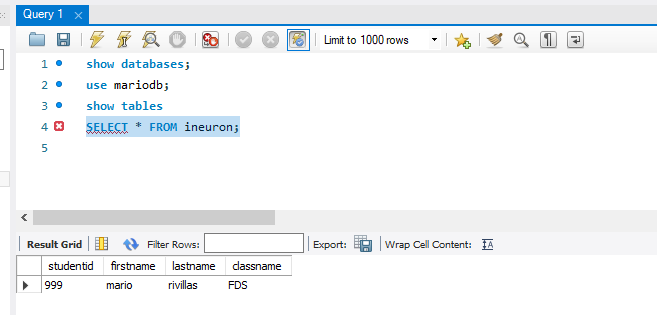

In [32]:
cursor.execute("select * from mariodb.ineuron")

In [33]:
cursor.fetchall()

[(999, 'mario', 'rivillas', 'FDS')]

In [34]:
# insert several rows into a database from a file
cursor.execute('create table mariodb.glassdata(Col1 INT(10), Col2 float(10,5), Col3 float(10,5), Col4 float(10,5), Col5 float(10,5), Col6 float(10,5), Col7 float(10,5), Col8 float(10,5), Col9 float(10,5), Col10 float(10,5), Col11 INT(10))')

In [57]:
cursor.execute("show tables")

In [58]:
cursor.fetchall()

[('glassdata',), ('ineuron',)]

In [55]:
cursor.execute("select * from mariodb.glassdata")

InternalError: Unread result found

In [51]:
file = open("D:\\lh_data\\ineuron\\glass_data.txt","r")
data = file.read()
data = data.split("\n")
for i in data:
    print(i)

183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6
184,1.51969,14.55,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6
185,1.51115,17.38,0.00,0.34,77.41,0.00,6.68,0.00,0.00,6
186,1.53215,16.15,3.22,1.89,72.18,1.76,5.43,1.19,0.00,7


In [64]:
import csv
with open("D:\\lh_data\\ineuron\\glass_data.txt","r") as f:
    data = csv.reader(f,delimiter='\n')
    for i in data:
        print(str(i[0]))

183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6
184,1.51969,14.55,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6
185,1.51115,17.38,0.00,0.34,77.41,0.00,6.68,0.00,0.00,6
186,1.53215,16.15,3.22,1.89,72.18,1.76,5.43,1.19,0.00,7


In [59]:
# insert a single line 
cursor.execute('insert into mariodb.glassdata values(183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6)')

In [60]:
mydb.commit()  

In [61]:
cursor.execute("select * from mariodb.glassdata")

In [62]:
cursor.fetchall()

[(183, 1.51916, 14.15, 0.0, 2.09, 72.74, 0.0, 10.88, 0.0, 0.0, 6)]

In [65]:
# insert several lines from a file
import csv
with open("D:\\lh_data\\ineuron\\glass_data.txt","r") as f:
    data = csv.reader(f,delimiter='\n')
    for i in data:
        cursor.execute(f'insert into mariodb.glassdata values({i[0]})')
        print(i[0])
f.close()
mydb.commit()

183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6
184,1.51969,14.55,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6
185,1.51115,17.38,0.00,0.34,77.41,0.00,6.68,0.00,0.00,6
186,1.53215,16.15,3.22,1.89,72.18,1.76,5.43,1.19,0.00,7


In [66]:
cursor.execute("select * from mariodb.glassdata")

In [67]:
cursor.fetchall()

[(183, 1.51916, 14.15, 0.0, 2.09, 72.74, 0.0, 10.88, 0.0, 0.0, 6),
 (183, 1.51916, 14.15, 0.0, 2.09, 72.74, 0.0, 10.88, 0.0, 0.0, 6),
 (184, 1.51969, 14.55, 0.0, 0.56, 73.48, 0.0, 11.22, 0.0, 0.0, 6),
 (185, 1.51115, 17.38, 0.0, 0.34, 77.41, 0.0, 6.68, 0.0, 0.0, 6),
 (186, 1.53215, 16.15, 3.22, 1.89, 72.18, 1.76, 5.43, 1.19, 0.0, 7)]

In [6]:
import pandas as pd
pd.read_sql("select * from mariodb.glassdata", mydb)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11
0,183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.0,6
1,183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.0,6
2,184,1.51969,14.55,0.00,0.56,73.48,0.00,11.22,0.00,0.0,6
3,185,1.51115,17.38,0.00,0.34,77.41,0.00,6.68,0.00,0.0,6
4,186,1.53215,16.15,3.22,1.89,72.18,1.76,5.43,1.19,0.0,7


In [7]:
pd.read_sql("show databases", mydb)

,Database
0,glassdata
1,glassdata1
2,glassdata2
3,information_schema
4,mariodb
5,mysql
6,performance_schema
7,student
8,sys


In [8]:
# execute a query
cursor.execute("show databases")

In [9]:
cursor.fetchall()

[('glassdata',),
 ('glassdata1',),
 ('glassdata2',),
 ('information_schema',),
 ('mariodb',),
 ('mysql',),
 ('performance_schema',),
 ('student',),
 ('sys',)]

In [10]:
cursor.execute(" use mariodb")

In [11]:
cursor.execute(" select * from mariodb.glassdata")

In [12]:
cursor.fetchall()

[(183, 1.51916, 14.15, 0.0, 2.09, 72.74, 0.0, 10.88, 0.0, 0.0, 6),
 (183, 1.51916, 14.15, 0.0, 2.09, 72.74, 0.0, 10.88, 0.0, 0.0, 6),
 (184, 1.51969, 14.55, 0.0, 0.56, 73.48, 0.0, 11.22, 0.0, 0.0, 6),
 (185, 1.51115, 17.38, 0.0, 0.34, 77.41, 0.0, 6.68, 0.0, 0.0, 6),
 (186, 1.53215, 16.15, 3.22, 1.89, 72.18, 1.76, 5.43, 1.19, 0.0, 7)]

In [13]:
cursor.execute("show tables")

In [14]:
cursor.fetchall()

[('glassdata',), ('ineuron',)]

In [15]:
cursor.execute(" select col1,col3,col5 from mariodb.glassdata")   # select a few columns from the table

In [16]:
cursor.fetchall()

[(183, 14.15, 2.09),
 (183, 14.15, 2.09),
 (184, 14.55, 0.56),
 (185, 17.38, 0.34),
 (186, 16.15, 1.89)]

In [17]:
cursor.execute(" select * from mariodb.glassdata WHERE Col1=183 and Col11=6 ")   # select a few columns from the table

In [18]:
cursor.fetchall()

[(183, 1.51916, 14.15, 0.0, 2.09, 72.74, 0.0, 10.88, 0.0, 0.0, 6),
 (183, 1.51916, 14.15, 0.0, 2.09, 72.74, 0.0, 10.88, 0.0, 0.0, 6)]

### DELETE A ROW

In [19]:
# delete a row by a column value
cursor.execute(" delete from mariodb.glassdata WHERE Col1=183 ")

In [20]:
cursor.execute(" select * from mariodb.glassdata")

In [21]:
cursor.fetchall()

[(184, 1.51969, 14.55, 0.0, 0.56, 73.48, 0.0, 11.22, 0.0, 0.0, 6),
 (185, 1.51115, 17.38, 0.0, 0.34, 77.41, 0.0, 6.68, 0.0, 0.0, 6),
 (186, 1.53215, 16.15, 3.22, 1.89, 72.18, 1.76, 5.43, 1.19, 0.0, 7)]

In [22]:
cursor.execute(" select * from mariodb.glassdata")

In [23]:
cursor.fetchall()

[(184, 1.51969, 14.55, 0.0, 0.56, 73.48, 0.0, 11.22, 0.0, 0.0, 6),
 (185, 1.51115, 17.38, 0.0, 0.34, 77.41, 0.0, 6.68, 0.0, 0.0, 6),
 (186, 1.53215, 16.15, 3.22, 1.89, 72.18, 1.76, 5.43, 1.19, 0.0, 7)]

### UPDATE

In [24]:
# update a value in a table
cursor.execute(" UPDATE mariodb.glassdata SET Col1 = 1 WHERE Col8 = 11.22")
cursor.execute(" UPDATE mariodb.glassdata SET Col1 = 2 WHERE Col8 = 6.68")
cursor.execute(" UPDATE mariodb.glassdata SET Col1 = 3 WHERE Col8 = 5.43")

In [25]:
cursor.execute(" select * from mariodb.glassdata")

In [26]:
cursor.fetchall()

[(1, 1.51969, 14.55, 0.0, 0.56, 73.48, 0.0, 11.22, 0.0, 0.0, 6),
 (2, 1.51115, 17.38, 0.0, 0.34, 77.41, 0.0, 6.68, 0.0, 0.0, 6),
 (3, 1.53215, 16.15, 3.22, 1.89, 72.18, 1.76, 5.43, 1.19, 0.0, 7)]

In [27]:
# grouping data by
cursor.execute(" select count(Col1), Col8 from mariodb.glassdata group by Col11 ")

In [28]:
cursor.fetchall()

[(2, 11.22), (1, 5.43)]

### ORDER BY

In [29]:
# order data by
cursor.execute(" select count(Col1), Col8 from mariodb.glassdata group by Col11 order by col8")

In [30]:
cursor.fetchall()

[(1, 5.43), (2, 11.22)]

In [31]:
cursor.execute(" select * from mariodb.ineuron")

In [32]:
cursor.fetchall()

[(999, 'mario', 'rivillas', 'FDS')]

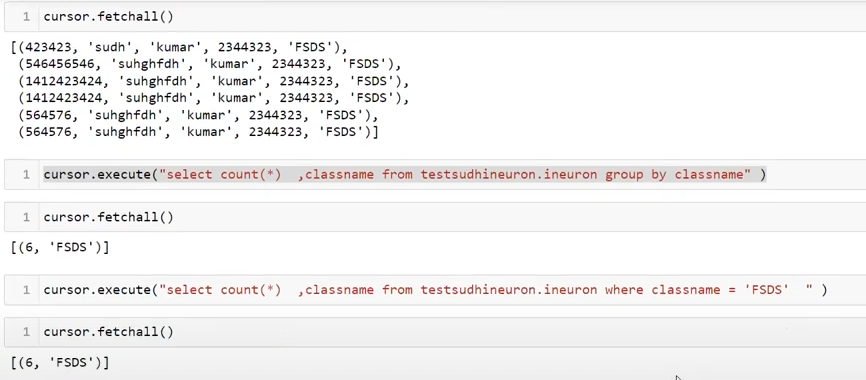

In [33]:
cursor.execute(" select * from mariodb.ineuron")

In [34]:
cursor.fetchall()

[(999, 'mario', 'rivillas', 'FDS')]

### DROP

In [37]:
# DROPPING a TABLE
cursor.execute("DROP TABLE mariodb.ineuron")

In [39]:
cursor.execute(" select * from mariodb.ineuron")

ProgrammingError: 1146 (42S02): Table 'mariodb.ineuron' doesn't exist

In [40]:
cursor.execute(" select * from mariodb.glassdata")

In [41]:
cursor.fetchall()

[(1, 1.51969, 14.55, 0.0, 0.56, 73.48, 0.0, 11.22, 0.0, 0.0, 6),
 (2, 1.51115, 17.38, 0.0, 0.34, 77.41, 0.0, 6.68, 0.0, 0.0, 6),
 (3, 1.53215, 16.15, 3.22, 1.89, 72.18, 1.76, 5.43, 1.19, 0.0, 7)]

In [43]:
cursor.execute("select * from mariodb.glassdata where col11=6 and col8=6.68")

In [44]:
cursor.fetchall()

[(2, 1.51115, 17.38, 0.0, 0.34, 77.41, 0.0, 6.68, 0.0, 0.0, 6)]

### LIKE

In [50]:
# fetching using LIKE command
cursor.execute("select * from mariodb.glassdata WHERE col2 LIKE '1.51%' ")

In [51]:
cursor.fetchall()

[(1, 1.51969, 14.55, 0.0, 0.56, 73.48, 0.0, 11.22, 0.0, 0.0, 6),
 (2, 1.51115, 17.38, 0.0, 0.34, 77.41, 0.0, 6.68, 0.0, 0.0, 6)]

### SUBQUERIES

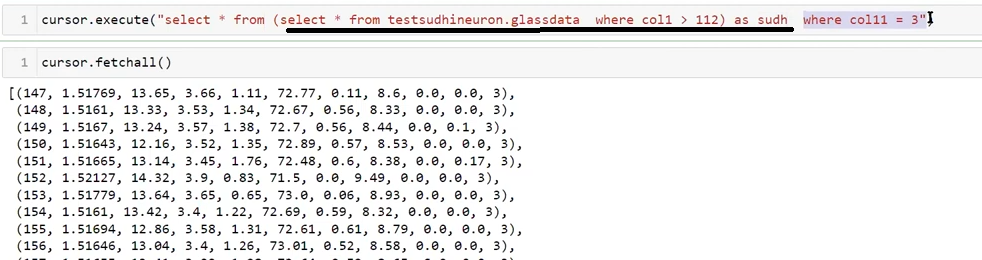

In [ ]:
### GROUP BY ... HAVING

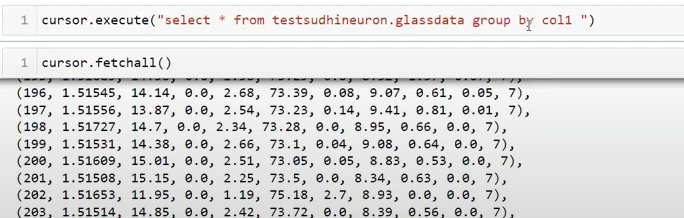

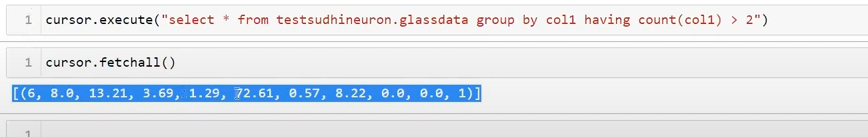

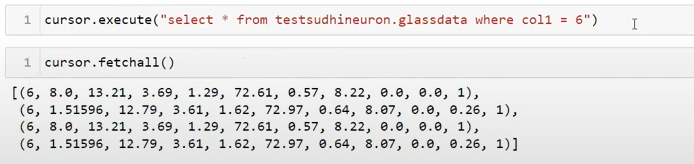